In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')


from matplotlib import rcParams
pd.set_option('display.max_columns', None)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

from datetime import date

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-small'
rcParams['ytick.labelsize'] = 'x-small'
rcParams['axes.labelsize'] = 'x-large'
rcParams['axes.titlesize'] = 'x-large'
rcParams['font.size'] = 10

# Import Data & Data Checking

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv('/content/gdrive/MyDrive/Rakamin JAP Project/Project 1 - Predict Customer Personality/2/marketing_campaign_data.csv')

Mounted at /content/gdrive


In [ ]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.shape

(2240, 30)

In [ ]:
df.ID.nunique()

2240

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Feature Engineering

## Conversion Rate, Age, Children, Total Spenditure, & Total Purchases

In [ ]:
df = df.drop(columns=['Unnamed: 0']) #Unnecessary Label

df['CR'] = df['Response']/df['NumWebVisitsMonth'] #Conversion Rate
df['Age'] =  date.today().year - df['Year_Birth'] #Age
df['Children'] = df['Kidhome'] + df['Teenhome'] #Num of Children
df['Total_Spend'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] #Total Spenditure
df['Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] #Total Purchases
df['Member_Period'] = date.today().year - df['Dt_Customer'].dt.year #Member Period

## Age Category

In [ ]:
df['Age'].describe()

,Age
count,2240.000000
mean,55.194196
std,11.984069
min,28.000000
25%,47.000000
50%,54.000000
75%,65.000000
max,131.000000


In [ ]:
def categorize_age(age):
    if age <= 20:
        return '<=20'
    elif 20 < age <= 30:
        return '20 < age <= 30'
    elif 30 < age <= 40:
        return '30 < age <= 40'
    elif 40 < age <= 50:
        return '40 < age <= 50'
    elif 50 < age <= 60:
        return '50 < age <= 60'
    else:
        return '>60'

df['Age_Category'] = df['Age'].apply(categorize_age)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CR,Age,Children,Total_Spend,Purchases,Member_Period,Age_Category
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.142857,67,0,1617000,25,12,>60
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.000000,70,2,27000,6,10,>60
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.000000,59,0,776000,21,11,50 < age <= 60
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.000000,40,1,53000,8,10,30 < age <= 40
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.000000,43,1,422000,19,10,40 < age <= 50


# Exploratory Data Analysis

## Data Category

In [ ]:
nums = df.select_dtypes(include='number').columns
cats = df.select_dtypes(include='object').columns

In [ ]:
df[nums].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CR,Age,Children,Total_Spend,Purchases,Member_Period
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2229.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.043686,55.194196,0.950446,6.057982e+05,14.862054,10.971875
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.142981,11.984069,0.751803,6.022493e+05,7.677173,0.684554
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,28.000000,0.000000,5.000000e+03,0.000000,10.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,47.000000,0.000000,6.875000e+04,8.000000,11.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,54.000000,1.000000,3.960000e+05,15.000000,11.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,65.000000,1.000000,1.045500e+06,21.000000,11.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.000000,131.000000,3.000000,2.525000e+06,44.000000,12.000000


In [ ]:
df[cats].describe()

,Education,Marital_Status,Age_Category
count,2240,2240,2240
unique,5,6,5
top,S1,Menikah,>60
freq,1127,864,744


In [ ]:
data_eng = ['CR',	'Age',	'Children',	'Total_Spend',	'Purchases', 'Member_Period']
df[data_eng].describe()

,CR,Age,Children,Total_Spend,Purchases,Member_Period
count,2229.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000
mean,0.043686,55.194196,0.950446,6.057982e+05,14.862054,10.971875
std,0.142981,11.984069,0.751803,6.022493e+05,7.677173,0.684554
min,0.000000,28.000000,0.000000,5.000000e+03,0.000000,10.000000
25%,0.000000,47.000000,0.000000,6.875000e+04,8.000000,11.000000
50%,0.000000,54.000000,1.000000,3.960000e+05,15.000000,11.000000
75%,0.000000,65.000000,1.000000,1.045500e+06,21.000000,11.000000
max,1.000000,131.000000,3.000000,2.525000e+06,44.000000,12.000000


## Data Distribution

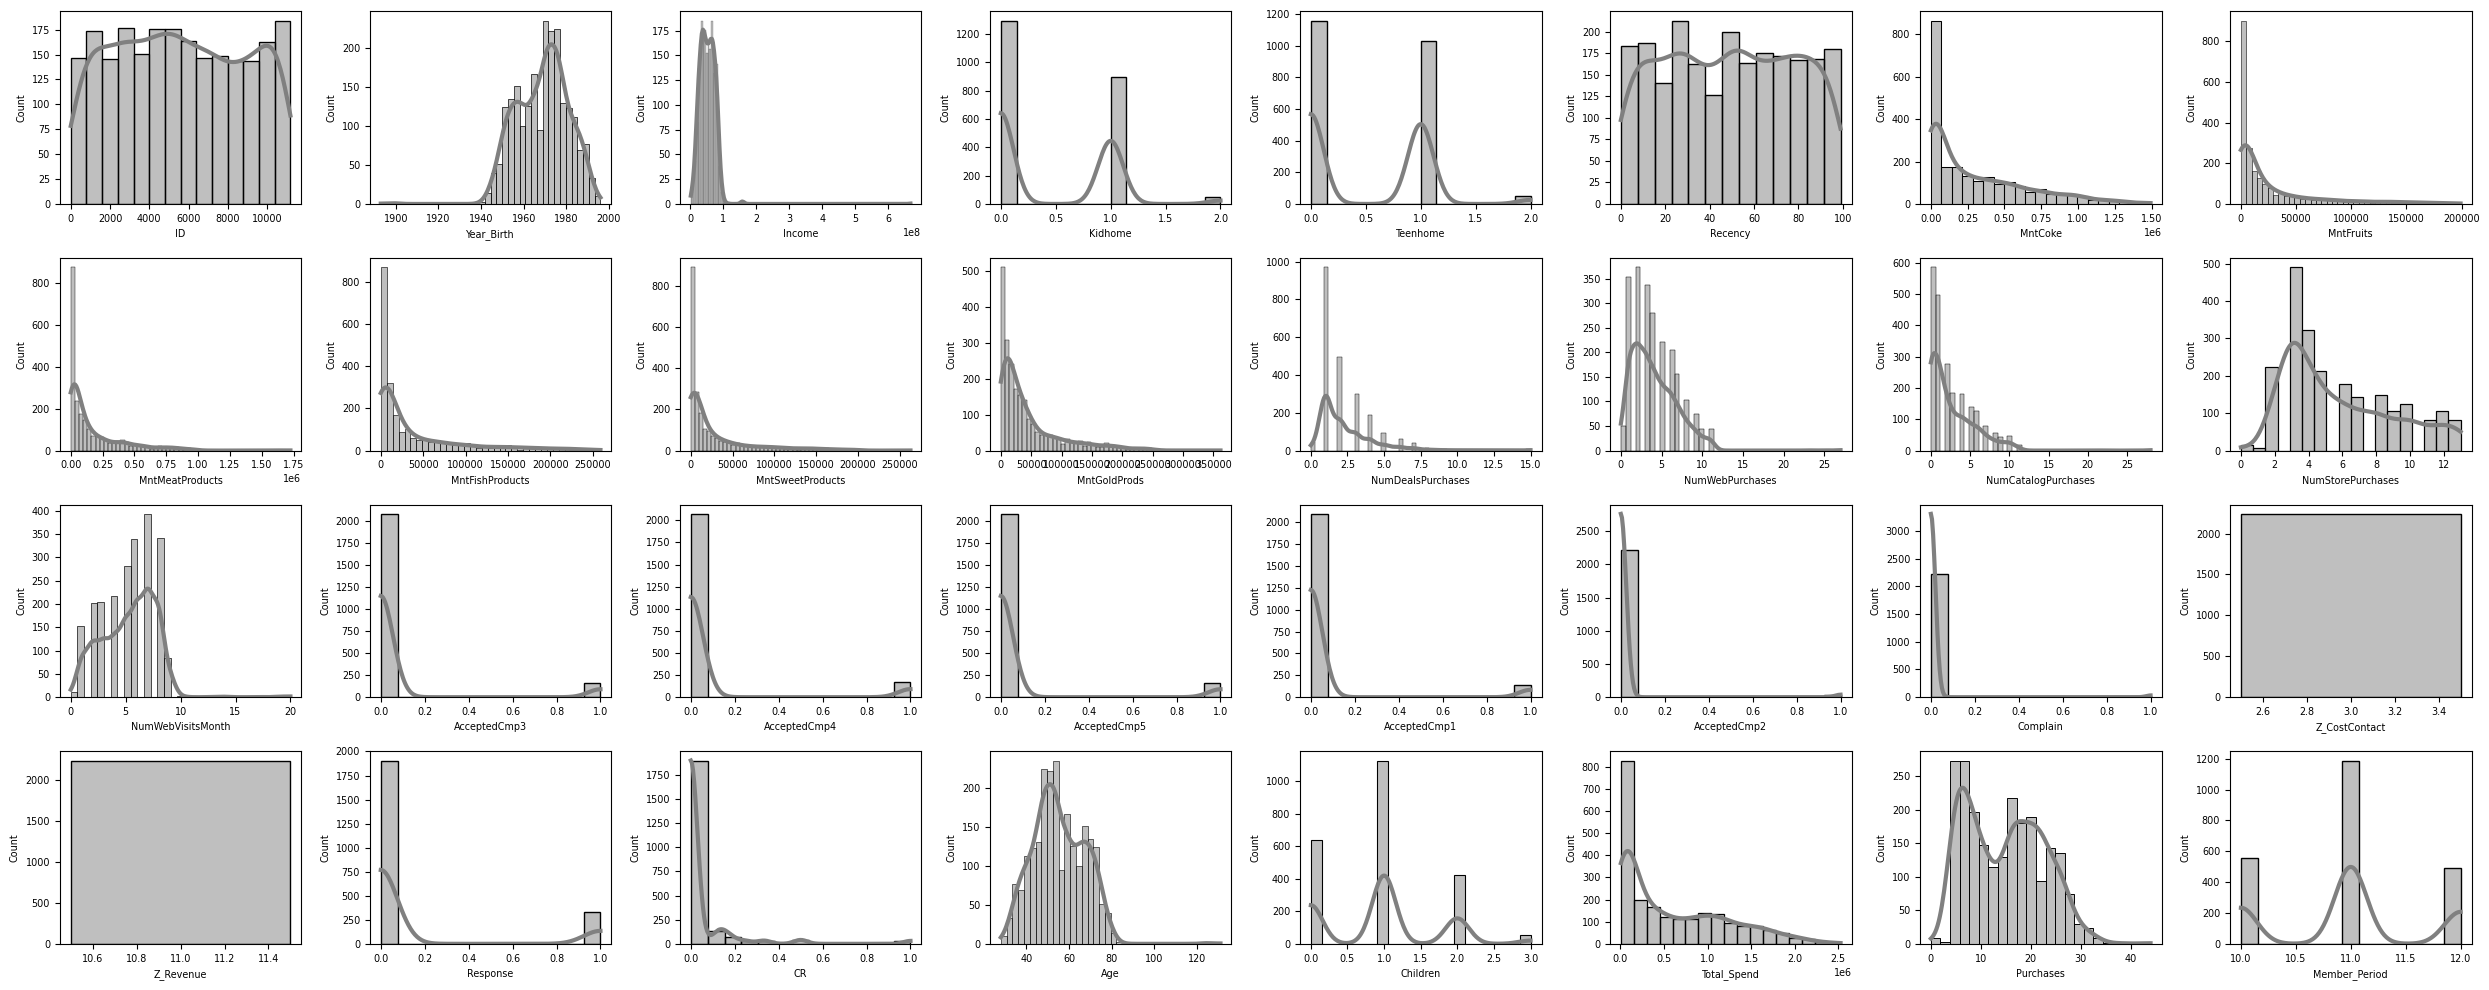

In [ ]:
plt.figure(figsize=(25, 10))
num_columns = 8
for i in range(0, len(nums)):
    plt.subplot(4, num_columns, i+1)
    sns.histplot(df[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

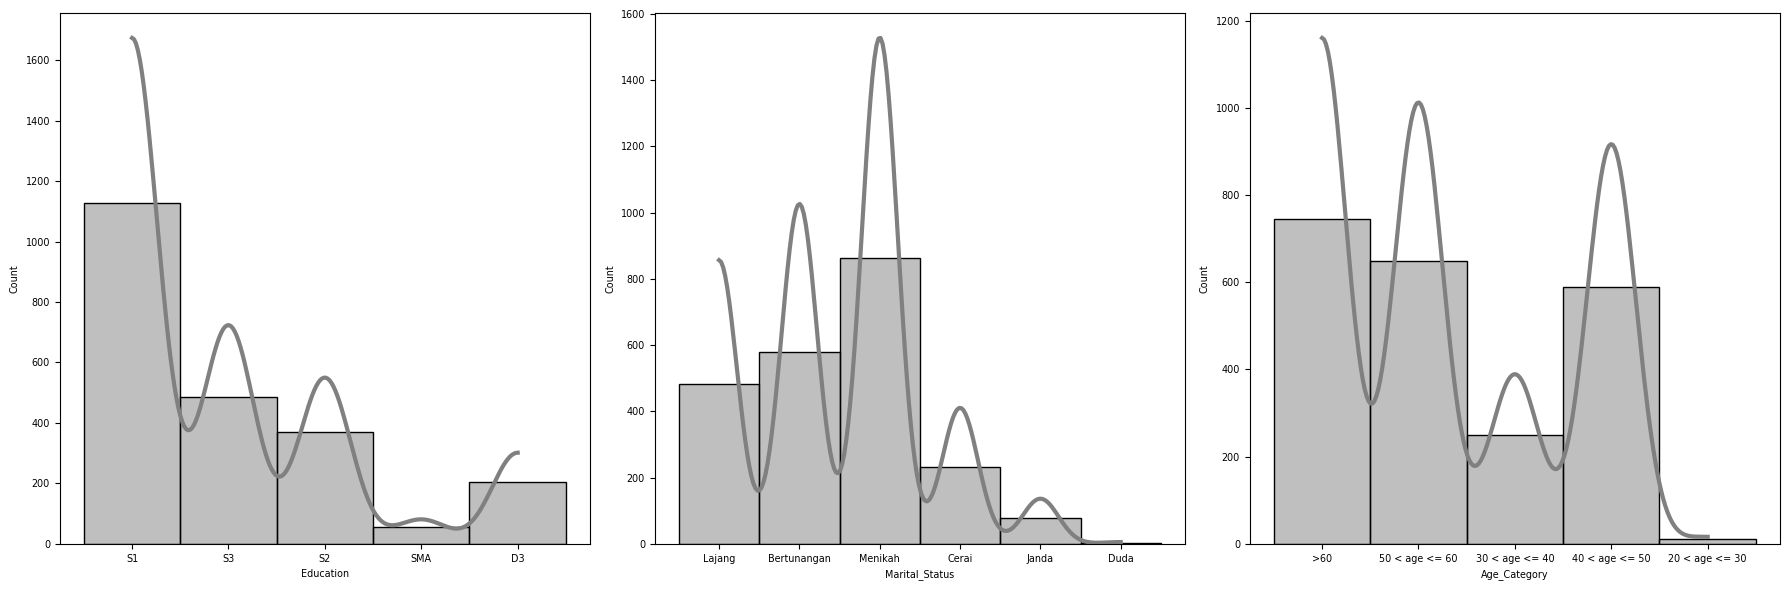

In [ ]:
plt.figure(figsize=(18, 6))
num_columns = 3
for i in range(0, len(cats)):
    plt.subplot(1, num_columns, i+1)
    sns.histplot(df[cats[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

## Correlation - Heat Map

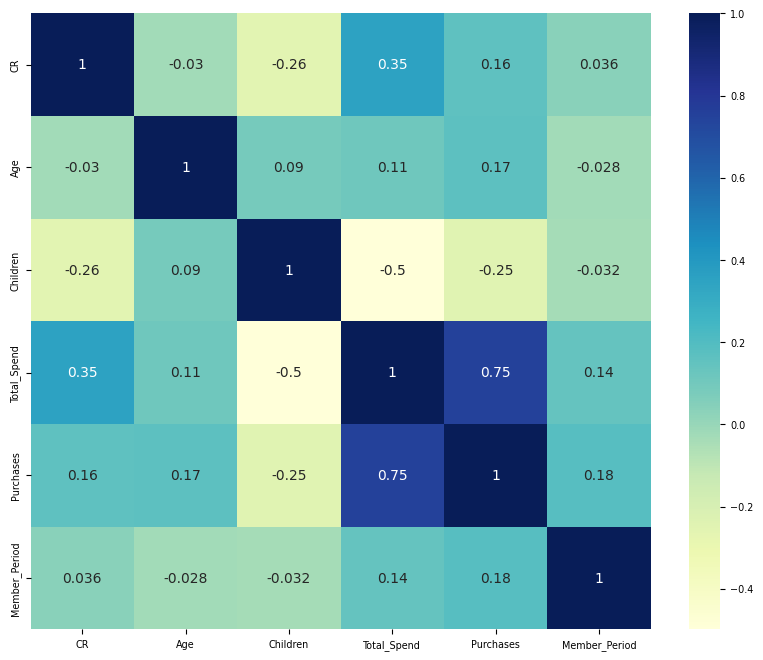

In [ ]:
correlation_matrix = df[data_eng].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

## Correlation - Pair Plot

<Figure size 1200x1200 with 0 Axes>

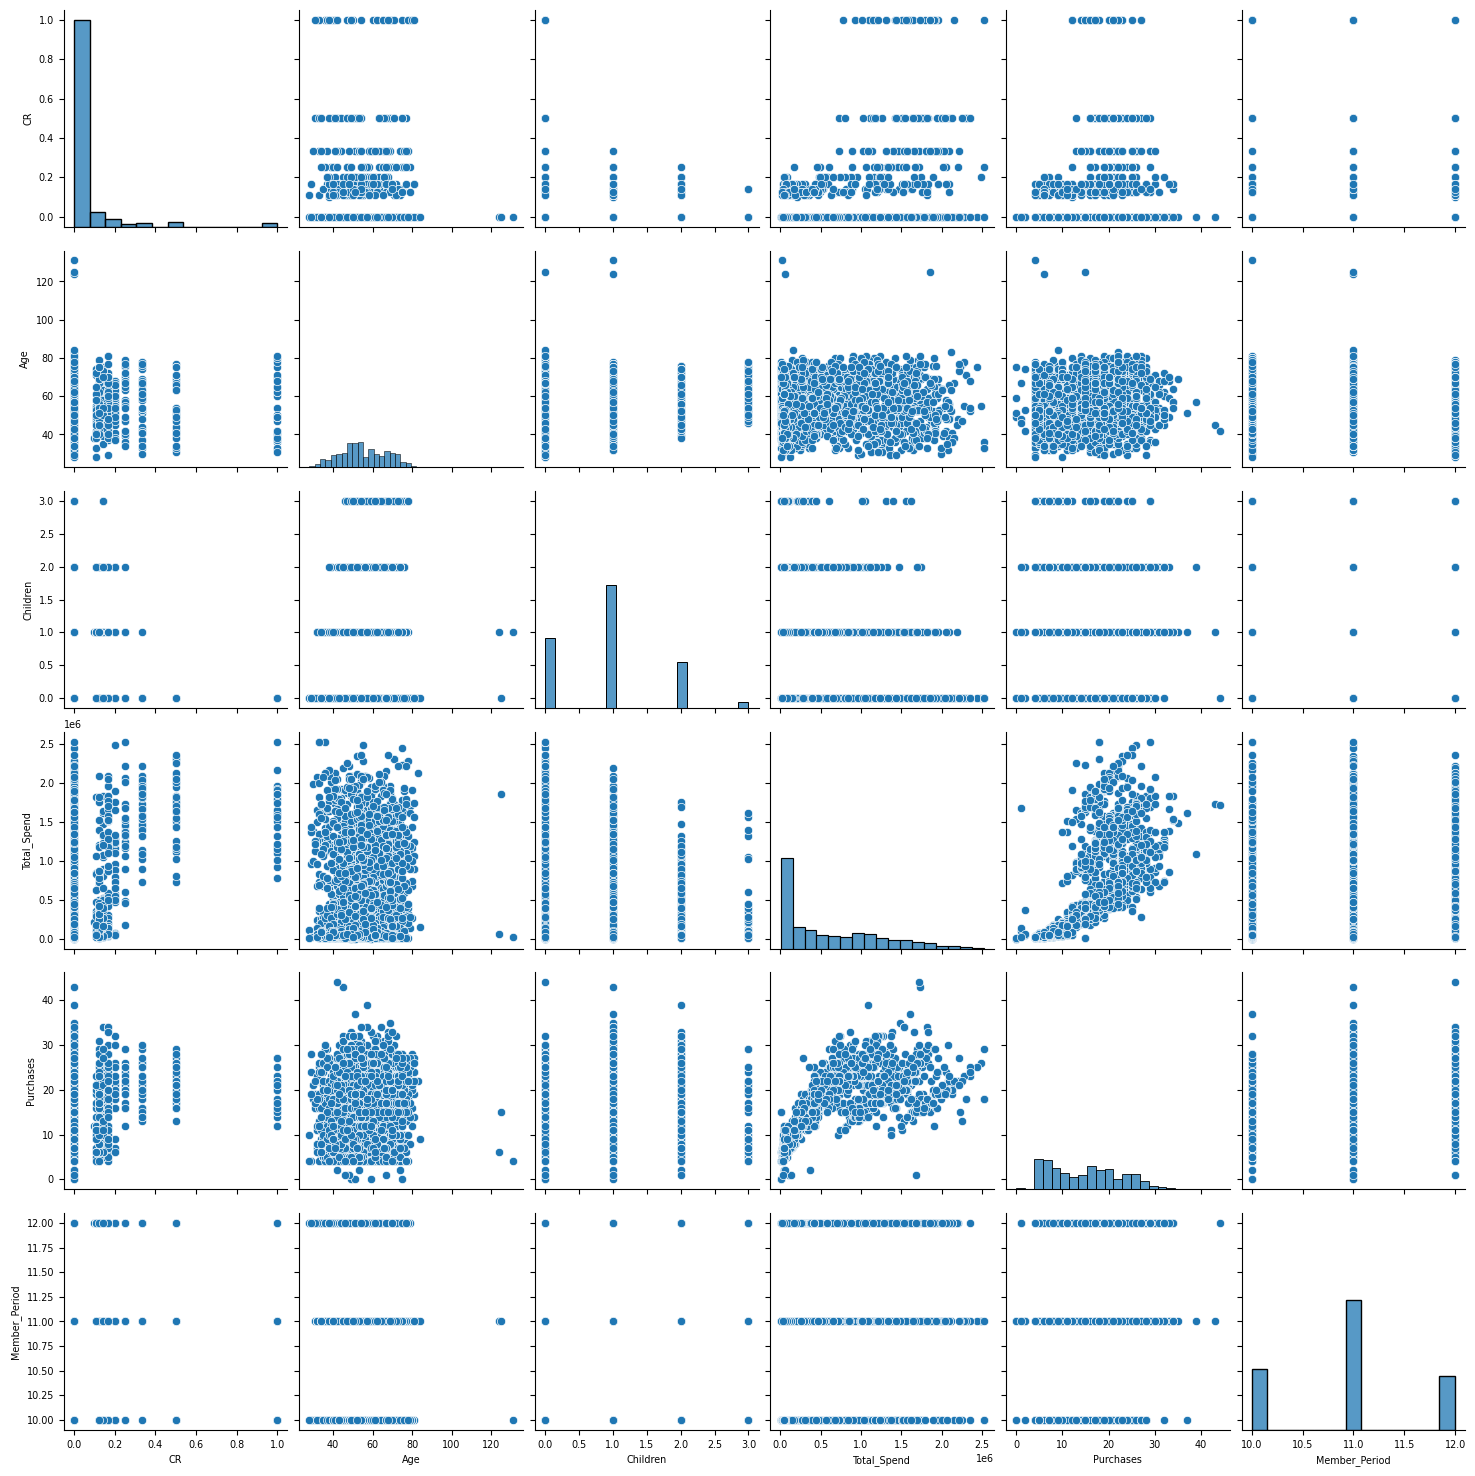

In [ ]:
# pair plot
plt.figure(figsize=(12, 12))
sns.pairplot(df[data_eng])
plt.show()

# Data Pre-Processing

## Handle Missing Value & Duplicated Data

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntCoke,0


In [ ]:
# Relatively few missing value , handling --> Drop
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()
# No duplicated data

0

## Feature Encoding

In [ ]:
# Categorical features: "Education" & "Marital_Status"
# Both features are non-ordinal, so One Hot Encoding (OHE) will be used to encode

df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], dtype=int)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CR,Age,Children,Total_Spend,Purchases,Member_Period,Age_Category,Education_D3,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,5524,1957,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.142857,67,0,1617000,25,12,>60,0,1,0,0,0,0,0,0,0,1,0
1,2174,1954,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.000000,70,2,27000,6,10,>60,0,1,0,0,0,0,0,0,0,1,0
2,4141,1965,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.000000,59,0,776000,21,11,50 < age <= 60,0,1,0,0,0,1,0,0,0,0,0
3,6182,1984,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.000000,40,1,53000,8,10,30 < age <= 40,0,1,0,0,0,1,0,0,0,0,0
4,5324,1981,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.000000,43,1,422000,19,10,40 < age <= 50,0,0,0,1,0,0,0,0,0,0,1


## Feature Selection

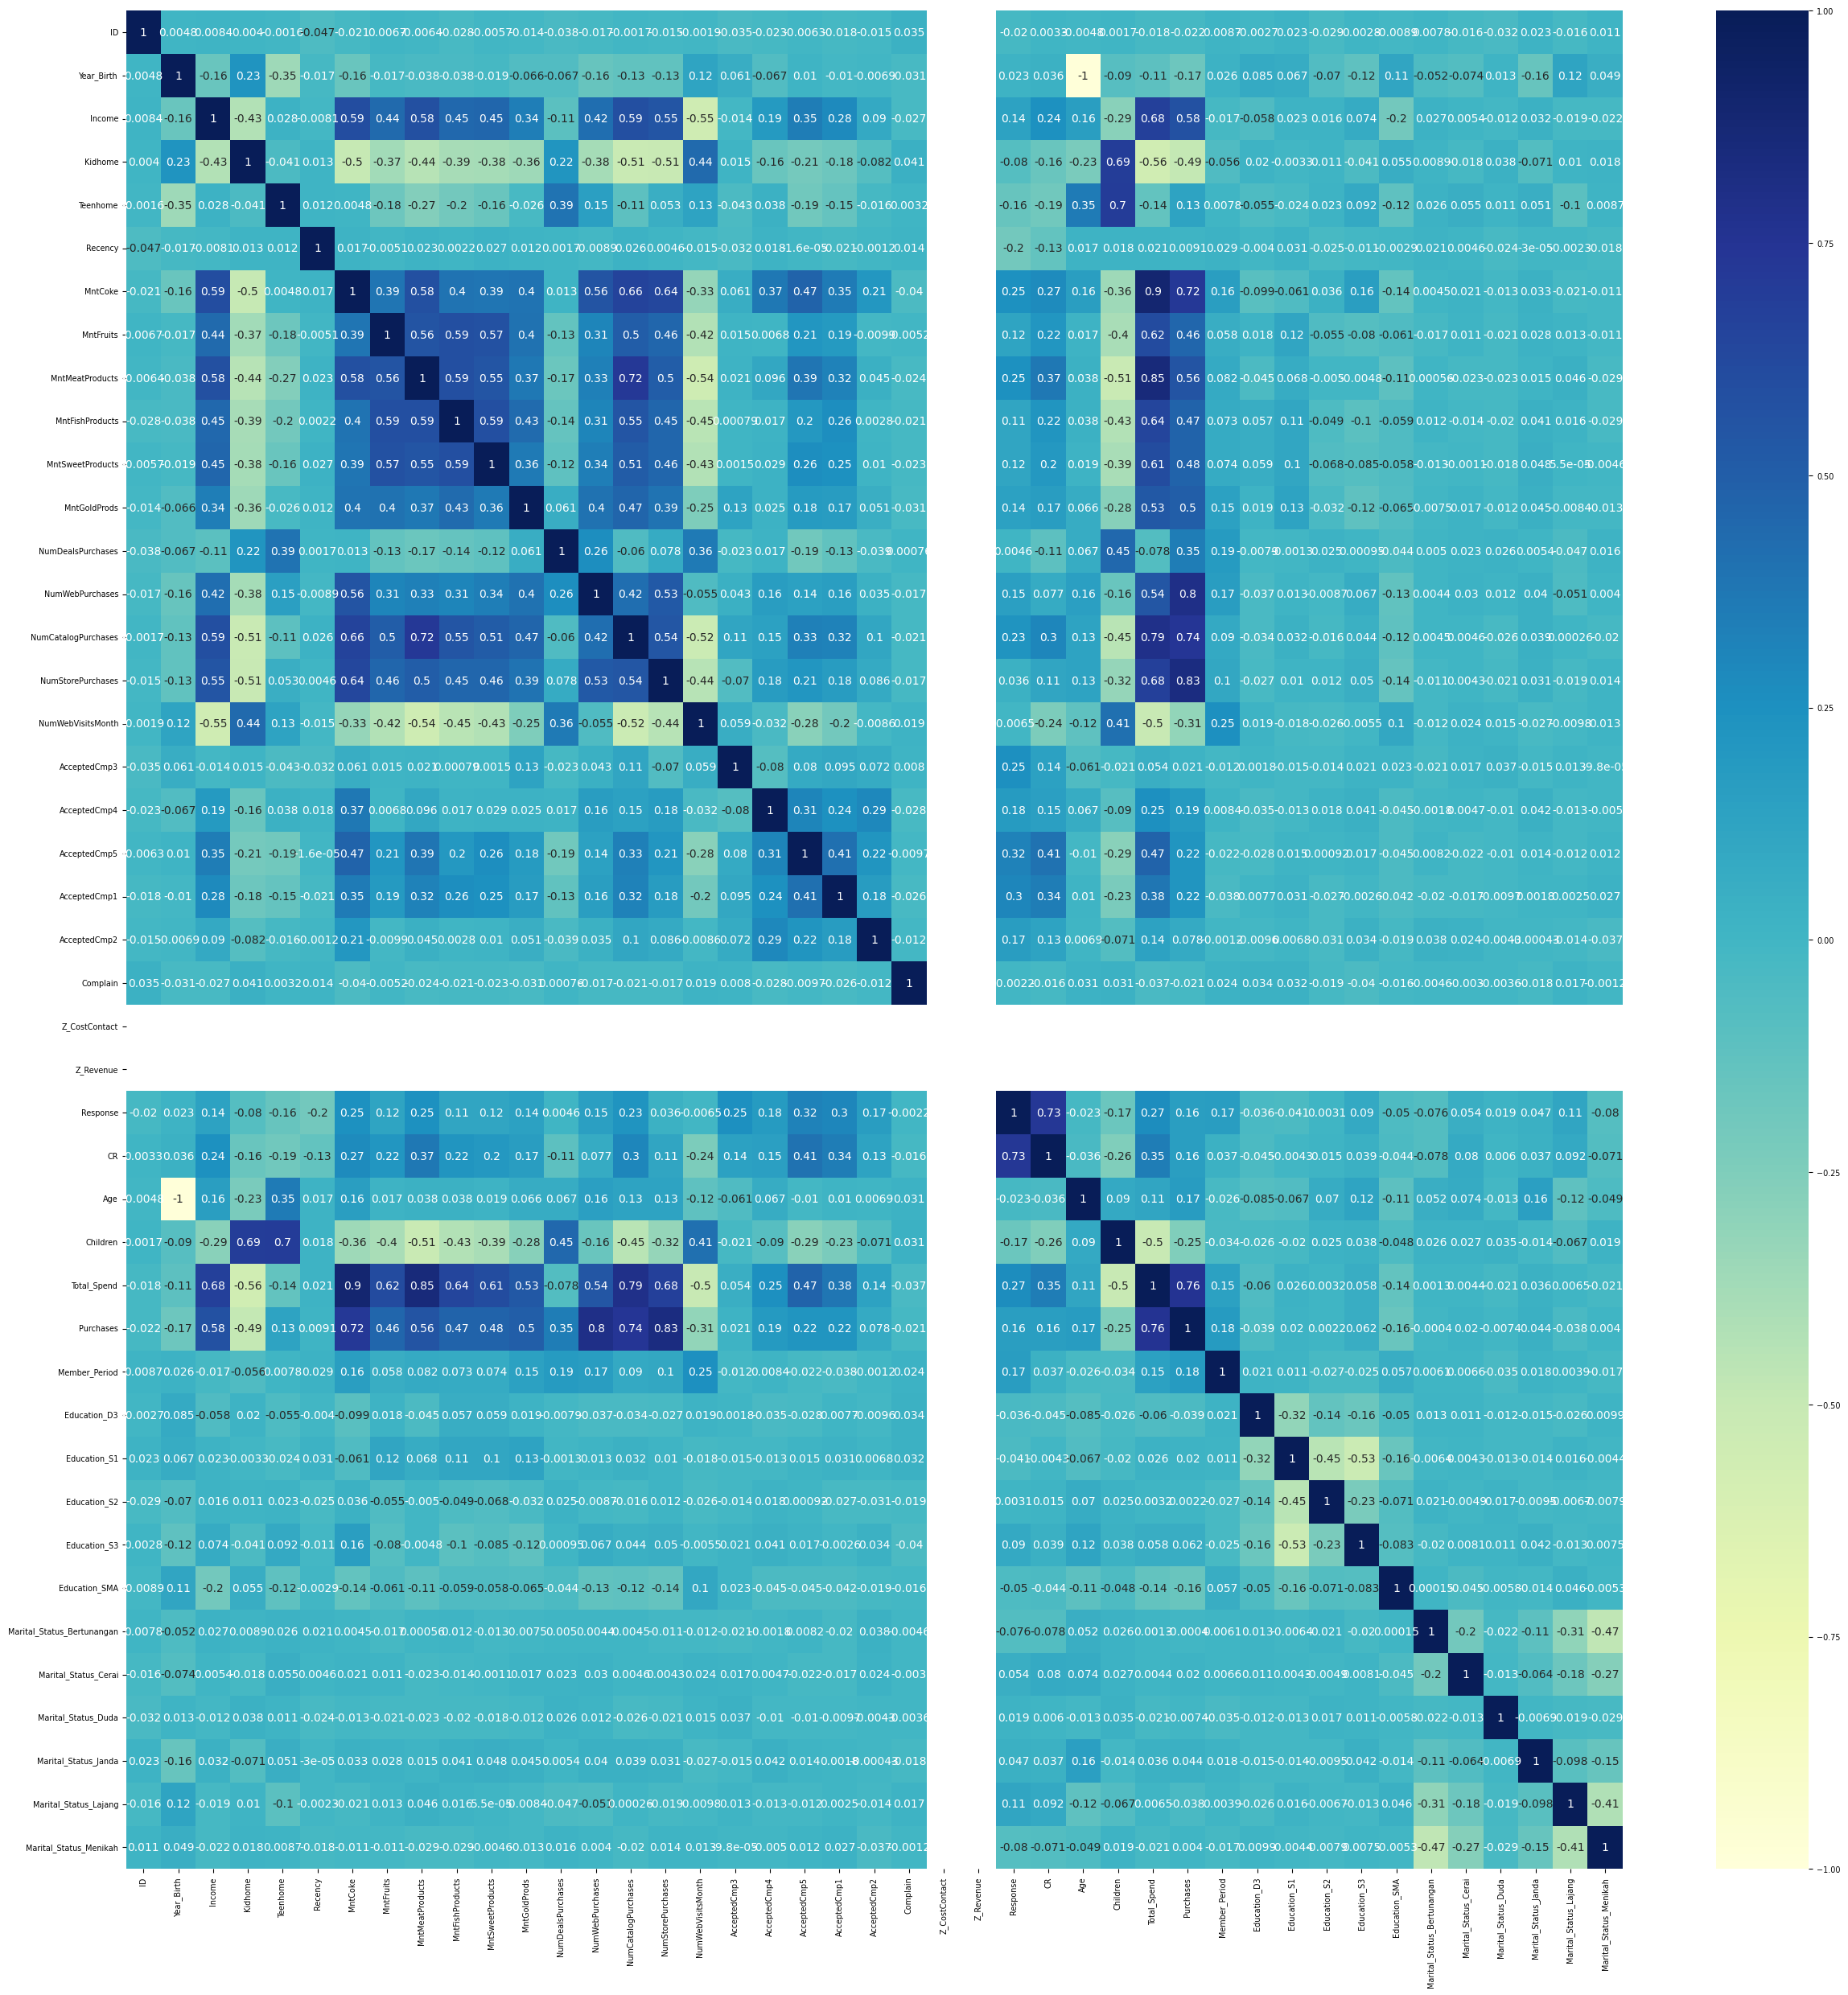

In [ ]:
nums_update = df.select_dtypes(include='number').columns
correlation_matrix = df[nums_update].corr()

# heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

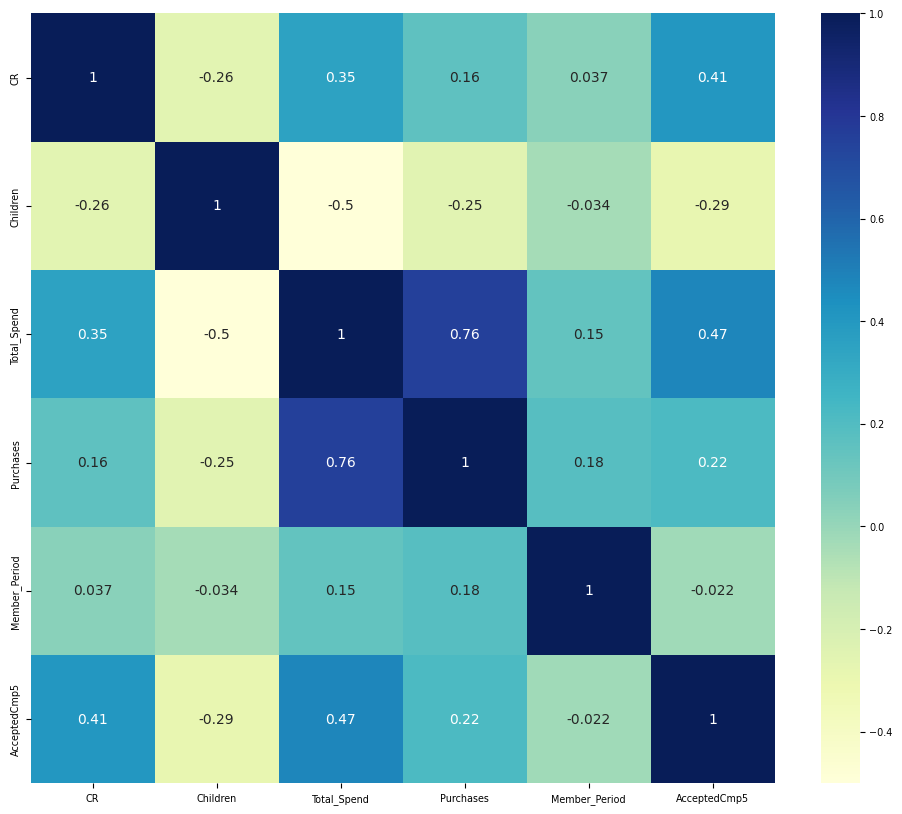

In [ ]:
nums_update2 = ['CR','Children','Total_Spend', 'Purchases', 'Member_Period', 'AcceptedCmp5']
correlation_matrix = df[nums_update2].corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

<Figure size 1200x1200 with 0 Axes>

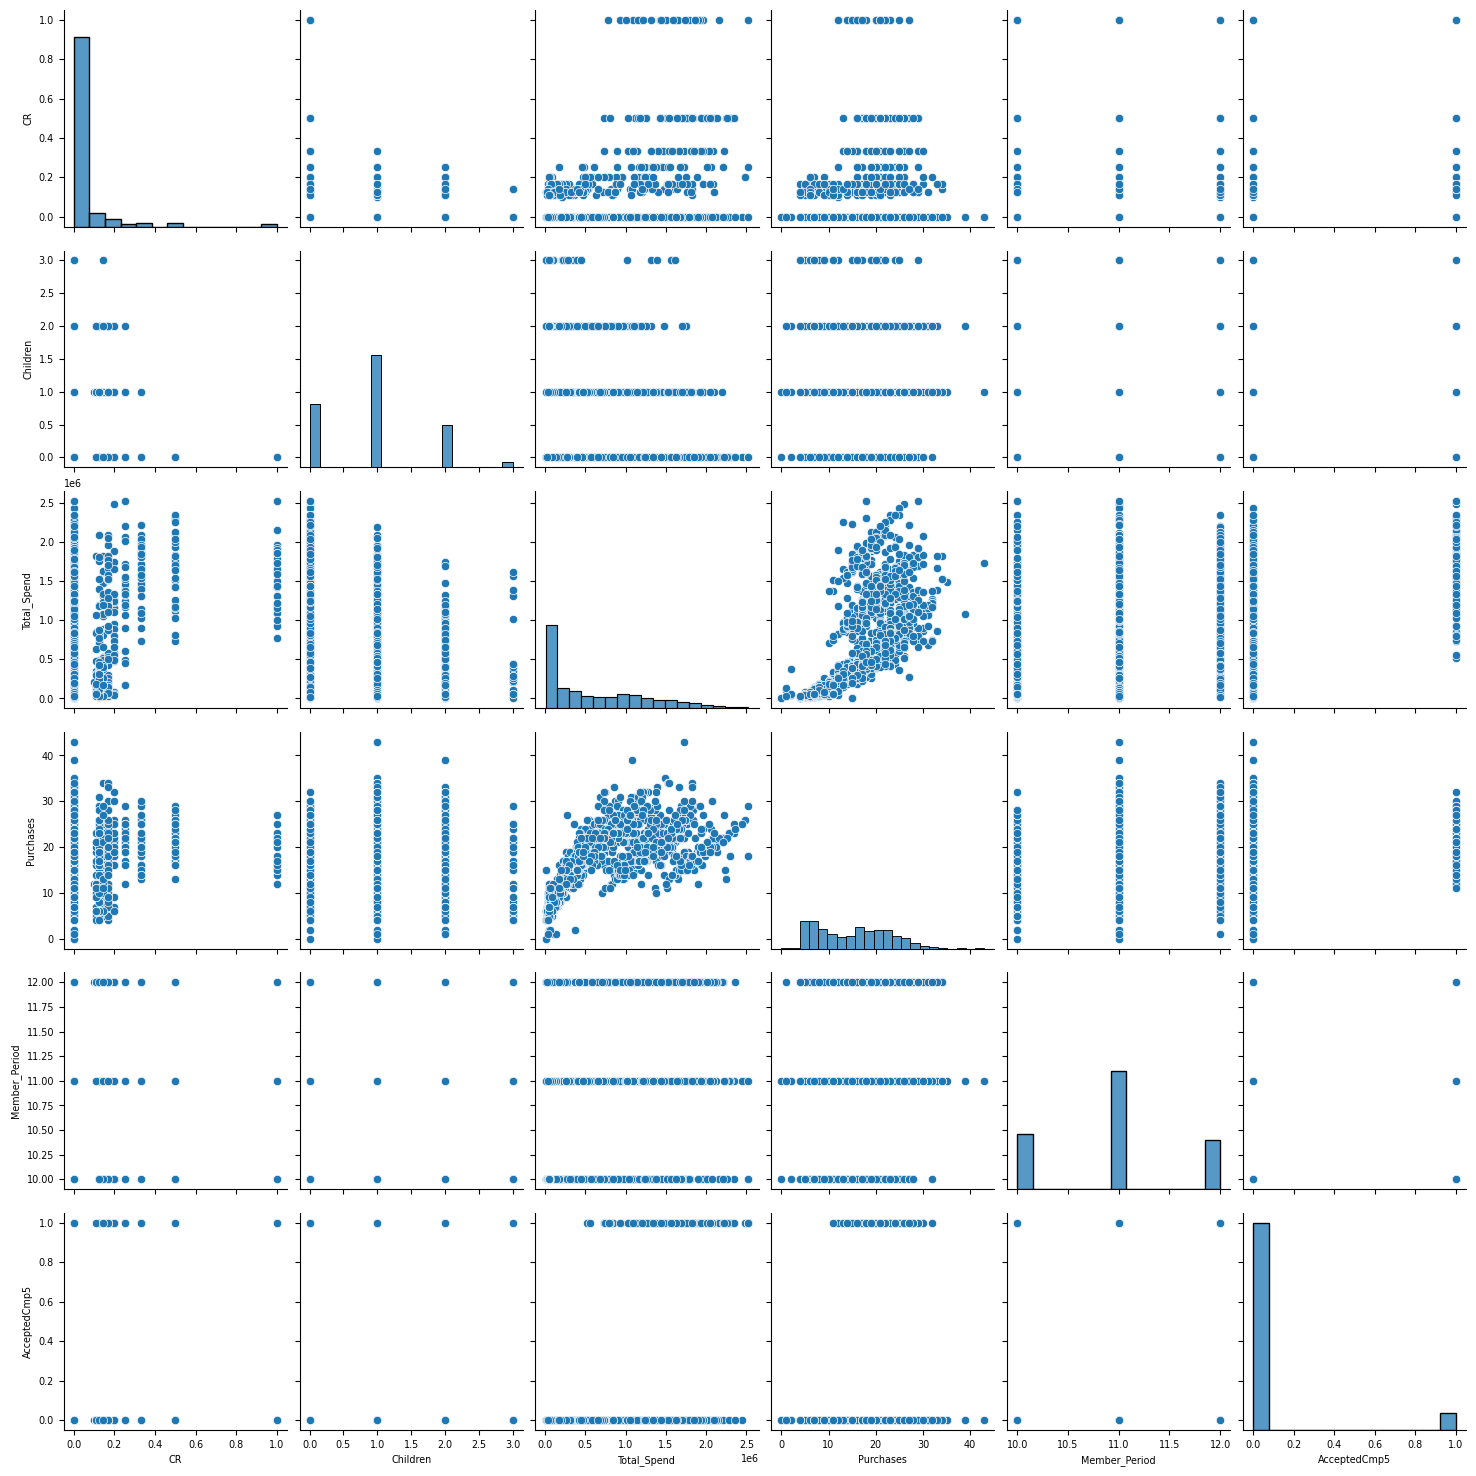

In [ ]:
# pair plot
plt.figure(figsize=(12, 12))
sns.pairplot(df[nums_update2])
plt.show()

In [ ]:
# Not relevant features: "ID"
# Same value for all customer: "Z_CostContact", "Z_Revenue"
# Almost no correlation: "Education", "Marital_Status", "Complain", "Member_Period","Age"
# Included on engineered features: "Year_Birth", "Kidhome", "Teenhome", "Dt_Customer", "MntXxx", "NumXxxPurchases", "Response", "NumWebVisitsMonth"
# From the heatmap, AcceptedCmpX seems to have a correlation with CR especially Cmp5 & Cmp1. Although definition is unclear, it will be included for clustering

df_selected = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Kidhome','Teenhome','Dt_Customer','Response','Year_Birth', 'Age_Category','MntCoke','MntFruits','NumWebVisitsMonth','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Education_D3','Education_S1','Education_S2','Education_S3','Education_SMA','Marital_Status_Bertunangan','Marital_Status_Cerai','Marital_Status_Duda','Marital_Status_Janda','Marital_Status_Lajang','Marital_Status_Menikah','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','Complain','Member_Period','Age'])
df_selected.head()

,Income,Recency,AcceptedCmp5,AcceptedCmp1,CR,Children,Total_Spend,Purchases
0,58138000.0,58,0,0,0.142857,0,1617000,25
1,46344000.0,38,0,0,0.000000,2,27000,6
2,71613000.0,26,0,0,0.000000,0,776000,21
3,26646000.0,26,0,0,0.000000,1,53000,8
4,58293000.0,94,0,0,0.000000,1,422000,19


## Handle Outliers

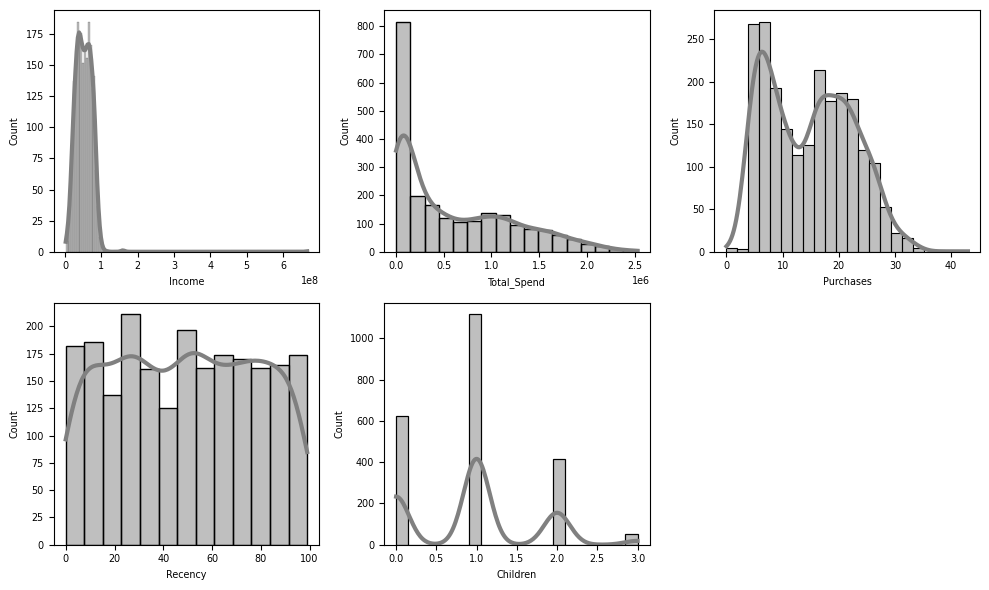

In [ ]:
nums_selected = ['Income', 'Total_Spend', 'Purchases','Recency', 'Children']

plt.figure(figsize=[10,6])

for i in range(0, len(nums_selected)):
  plt.subplot(2, 3, i+1)
  sns.histplot(df_selected[nums_selected[i]], color='gray', kde=True)
  plt.tight_layout()

plt.show()

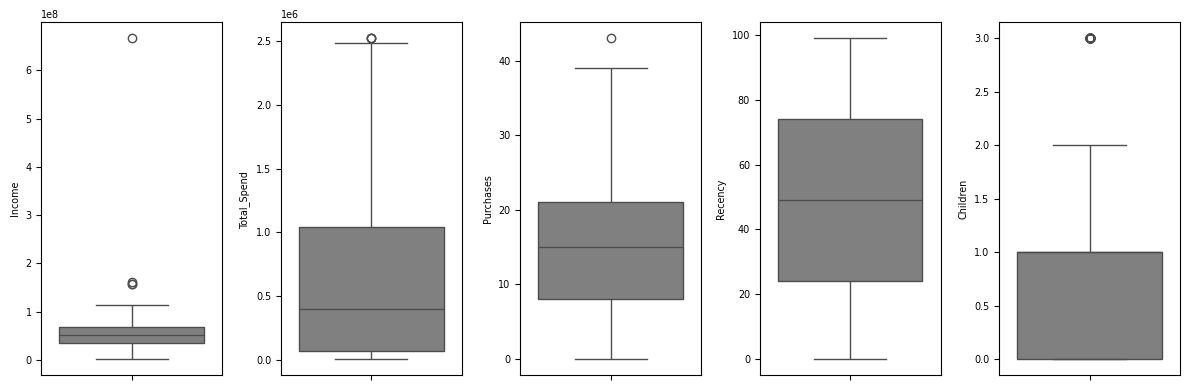

In [ ]:
for i in range(0, len(nums_selected)):
    plt.subplot(1, len(nums_selected), i+1)
    sns.boxplot(y=df_selected[nums_selected[i]], color='gray', orient='v')
    plt.tight_layout()

plt.show()

In [ ]:
# "Member_Period" & "Children" data are only spread on small value variation, therefore outliers will not be removed
# No outlier detected on "Recency"
# Use IQR method for "Income", "Total_Spend", "Purchases", & "Age"

print(f'Rows before outlier filtering: {len(df_selected)}')

filtered_entries = np.array([True] * len(df_selected))
for col in ['Income','Total_Spend','Purchases']:
    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_selected[col] >= low_limit) & (df_selected[col] <= high_limit)) & filtered_entries

df_selected = df_selected[filtered_entries]

print(f'Rows after outlier filtering: {len(df_selected)}')

Rows before outlier filtering: 2206
Rows after outlier filtering: 2198


## Feature Standardization

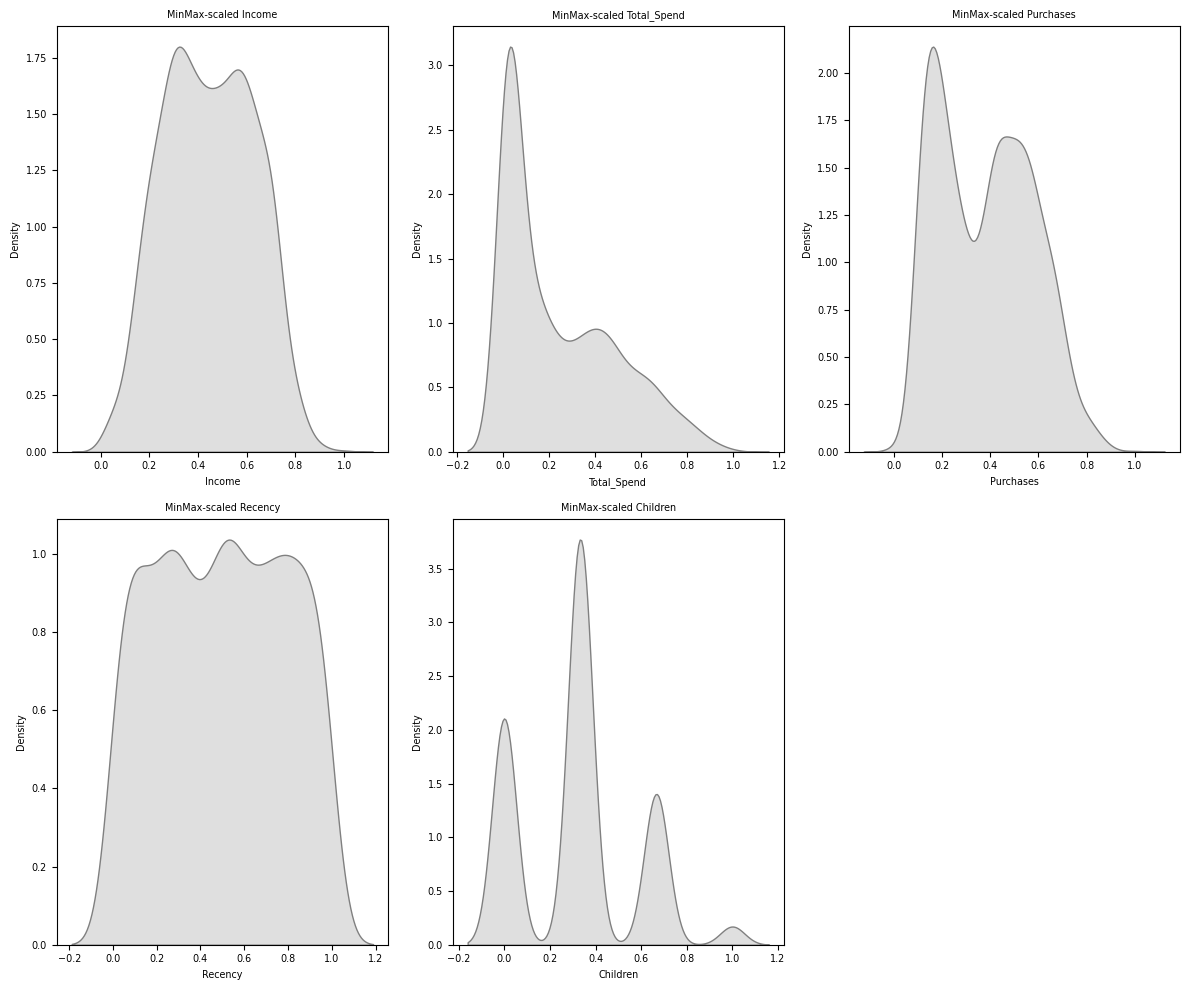

In [ ]:
scaler = MinMaxScaler()

df_selected_scaled = df_selected.copy()

# Scaling
for col in nums_selected:
    df_selected_scaled[col] = scaler.fit_transform(df_selected_scaled[[col]])

# Plotting
plt.figure(figsize=(12, 10))

for i in range(len(nums_selected)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df_selected_scaled[nums_selected[i]], color='gray', fill=True)
    plt.title(f'MinMax-scaled {nums_selected[i]}')
    plt.tight_layout()


In [ ]:
df_selected_scaled.head()

,Income,Recency,AcceptedCmp5,AcceptedCmp1,CR,Children,Total_Spend,Purchases
0,0.503625,0.585859,0,0,0.142857,0.000000,0.649738,0.641026
1,0.398325,0.383838,0,0,0.000000,0.666667,0.008867,0.153846
2,0.623933,0.262626,0,0,0.000000,0.000000,0.310762,0.538462
3,0.222456,0.262626,0,0,0.000000,0.333333,0.019347,0.205128
4,0.505009,0.949495,0,0,0.000000,0.333333,0.168077,0.487179


# Clustering

## Feature Re-Selection

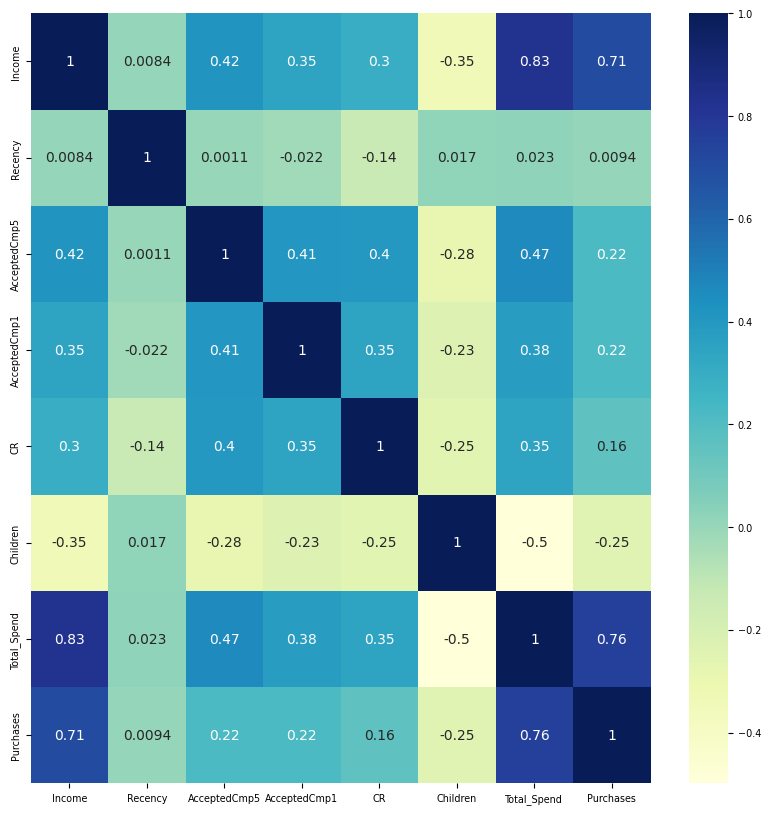

In [ ]:
correlation_matrix = df_selected_scaled.corr()

# heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
selected_features = ['Total_Spend','AcceptedCmp5', 'Children']
df_selected2 = df_selected_scaled[selected_features]

## Cluster Number Using Elbow Method

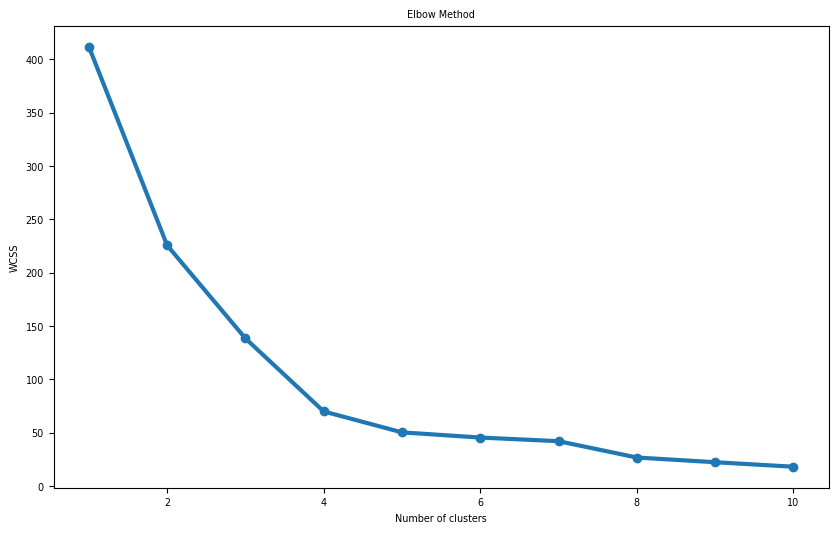

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_selected2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Sillhouette Score

In [ ]:
cluster_range = range(2, 7)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_selected2)
    clusters = kmeans.predict(df_selected2)
    sil_score = silhouette_score(df_selected2, clusters)
    print(f"Silhouette Score for {i} clusters: {sil_score}")

Silhouette Score for 2 clusters: 0.6719952199591978
Silhouette Score for 3 clusters: 0.47981786689326594
Silhouette Score for 4 clusters: 0.5603286180064139
Silhouette Score for 5 clusters: 0.5986645429261973
Silhouette Score for 6 clusters: 0.607501848765953


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_selected2)
clusters = kmeans.predict(df_selected2)

df_check = df_selected.copy()
df_check['Cluster'] = clusters

for i in range(5):
    print(f"Cluster {i} description:")
    print(df_check[df_check['Cluster'] == i][['Total_Spend','CR','Children','Income']].describe())

Cluster 0 description:
         Total_Spend          CR    Children        Income
count     880.000000  880.000000  880.000000  8.800000e+02
mean   173084.090909    0.013577    0.835227  3.655274e+07
std    162865.501358    0.042251    0.371186  1.454524e+07
min      5000.000000    0.000000    0.000000  1.730000e+06
25%     46000.000000    0.000000    1.000000  2.549250e+07
50%     93000.000000    0.000000    1.000000  3.566150e+07
75%    279000.000000    0.000000    1.000000  4.663050e+07
max    590000.000000    0.250000    1.000000  1.137340e+08
Cluster 1 description:
        Total_Spend          CR    Children        Income
count  1.590000e+02  159.000000  159.000000  1.590000e+02
mean   1.599296e+06    0.245061    0.188679  8.221511e+07
std    4.044275e+05    0.294469    0.479581  8.796106e+06
min    5.230000e+05    0.000000    0.000000  5.156300e+07
25%    1.364000e+06    0.000000    0.000000  7.744700e+07
50%    1.631000e+06    0.166667    0.000000  8.238400e+07
75%    1.901500e+

For n_clusters = 3, the average silhouette_score is : 0.47981786689326594
For n_clusters = 4, the average silhouette_score is : 0.5603286180064139
For n_clusters = 5, the average silhouette_score is : 0.5986645429261973


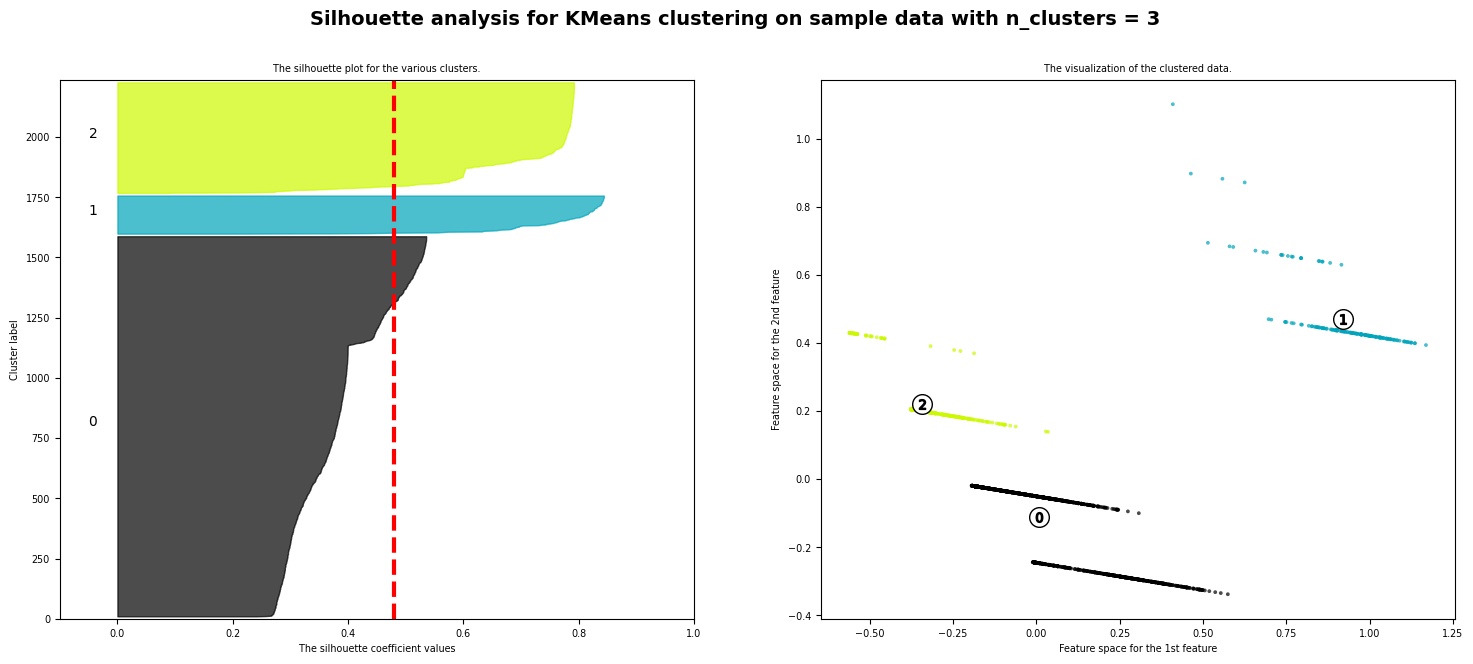

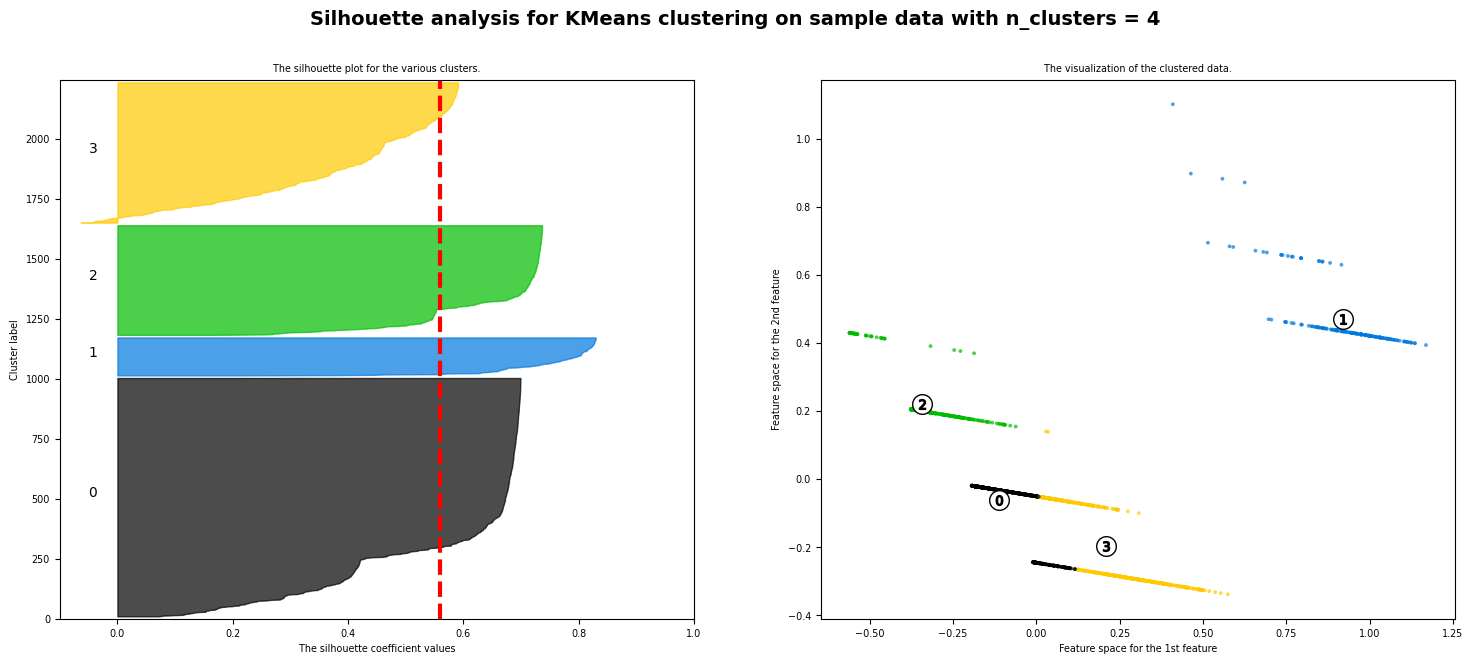

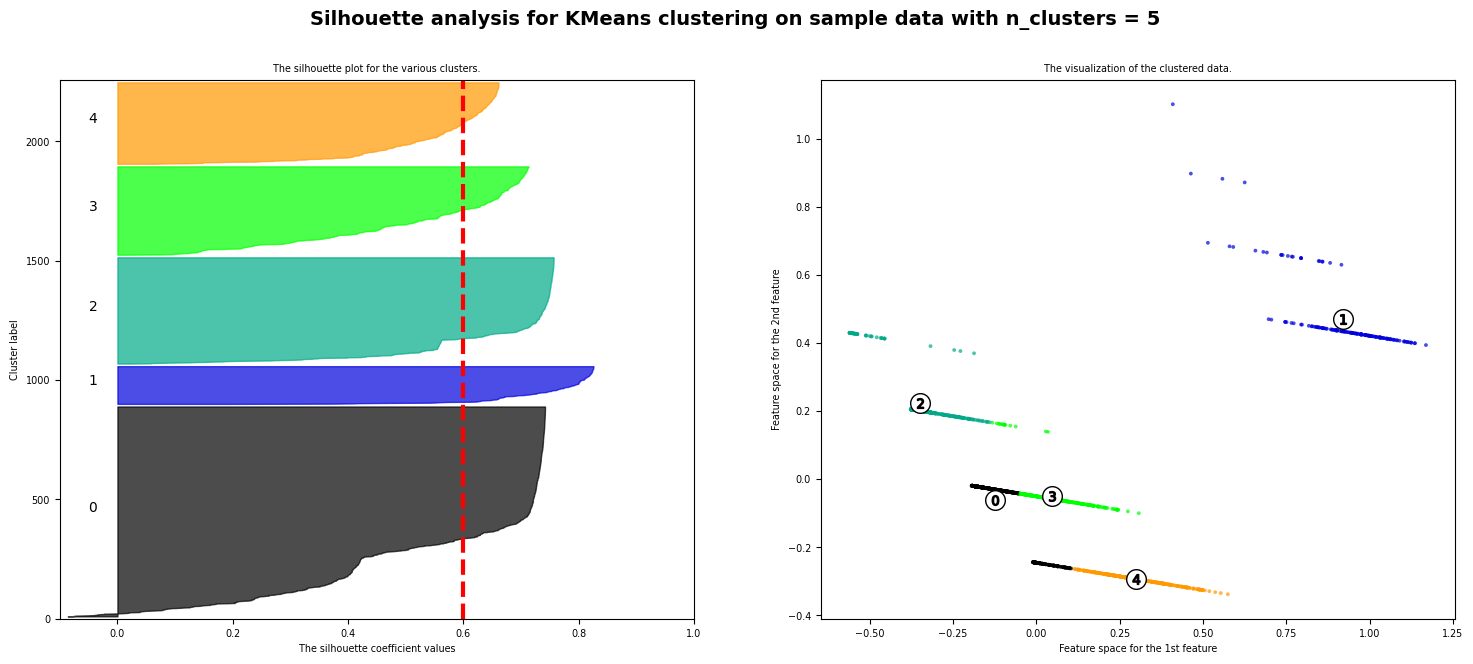

In [ ]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Setup subplot untuk silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_selected2) + (n_clusters + 1) * 10])

    # Menerapkan KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_selected2)

    # Silhouette score
    silhouette_avg = silhouette_score(df_selected2, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Mendapatkan silhouette scores untuk setiap sample
    sample_silhouette_values = silhouette_samples(df_selected2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(df_selected2)

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_pca[:, 0], data_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = pca.transform(kmeans.cluster_centers_)
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}", fontsize=14, fontweight='bold')

plt.show()


In [ ]:
df_check.head()

,Income,Recency,AcceptedCmp5,AcceptedCmp1,CR,Children,Total_Spend,Purchases,Cluster
0,58138000.0,58,0,0,0.142857,0,1617000,25,4
1,46344000.0,38,0,0,0.000000,2,27000,6,2
2,71613000.0,26,0,0,0.000000,0,776000,21,4
3,26646000.0,26,0,0,0.000000,1,53000,8,0
4,58293000.0,94,0,0,0.000000,1,422000,19,0


In [ ]:
df_agg = df_check.groupby('Cluster').mean()
df_agg.drop(columns=['Recency','AcceptedCmp5','AcceptedCmp1', 'Purchases'], inplace=True)

df_agg.reset_index(inplace=True)
df_agg.drop(columns='Cluster', inplace=True)
df_agg.head()

,Income,CR,Children,Total_Spend
0,3.655274e+07,0.013577,0.835227,1.730841e+05
1,8.221511e+07,0.245061,0.188679,1.599296e+06
2,4.347332e+07,0.014540,2.109865,2.054507e+05
3,6.470783e+07,0.014515,1.037736,1.032927e+06
4,7.213625e+07,0.094572,0.000000,1.295047e+06


In [ ]:
df_agg_scaled = df_agg.copy()
for col in ['Income','CR','Children', 'Total_Spend']:
    df_agg_scaled[col] = scaler.fit_transform(df_agg_scaled[[col]])
df_agg_scaled = df_agg_scaled.transpose()
df_agg_scaled.head()

,0,1,2,3,4
Income,0.000000,1.000000,0.151560,0.616593,0.779274
CR,0.000000,1.000000,0.004162,0.004051,0.349896
Children,0.395868,0.089427,1.000000,0.491849,0.000000
Total_Spend,0.000000,1.000000,0.022694,0.602886,0.786673


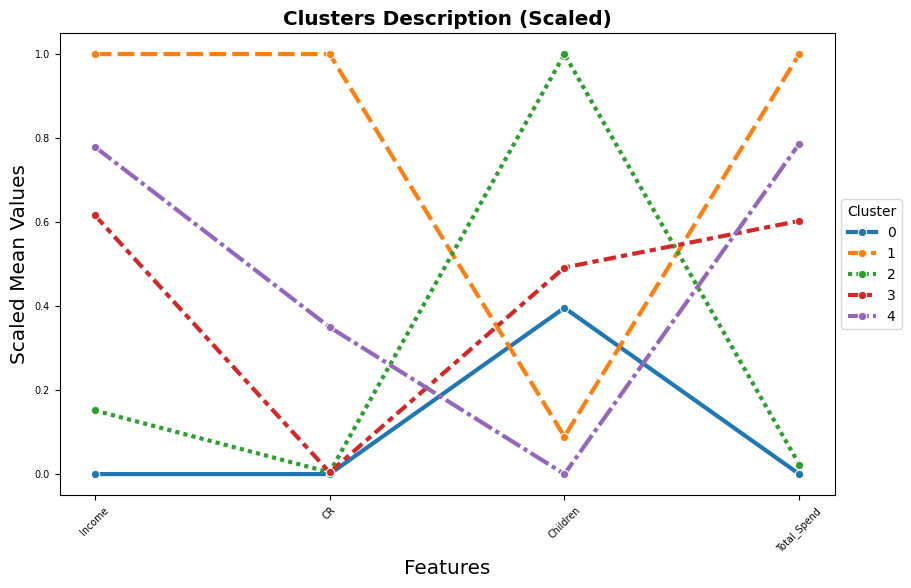

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data:= df_agg_scaled, marker='o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Cluster")
plt.xticks(rotation=45)
plt.title('Clusters Description (Scaled)', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Scaled Mean Values')
plt.show()